# Hypothesis: Population and Pollution
This analysis explores whether areas with higher total population tend to have higher pollution levels. Total population reflects the size of a city or region, which may influence the amount of pollution generated and the scale of human activity.

**Rationale:**
- Larger populations may produce more emissions from vehicles, industry, and households, potentially increasing pollutant concentrations.
- Smaller populations may have less overall pollution, but local factors can still play a role.

**Method:**
- Select the best available population column (city, state, or general population).
- Plot pollutant values against total population for each pollutant.

**Interpretation:**
- Look for positive or negative trends between population and pollutant values.
- Clusters or outliers may indicate specific cities or regions with unique pollution profiles.

---

c:\Users\Daniel\vsc-projects\codeinstitute\projects\us-pollution-data\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


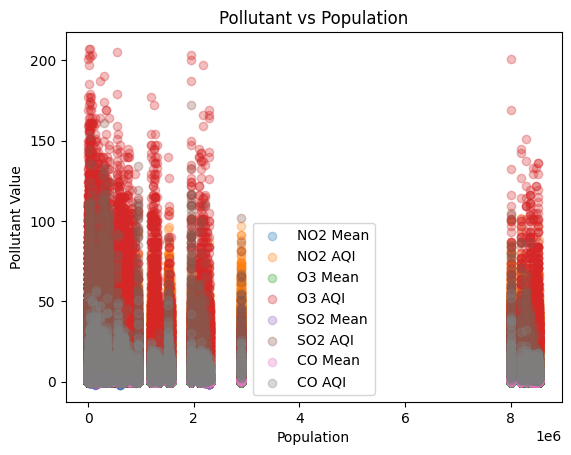

In [6]:
# Pollutant Value vs Population
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet('../data/cleaned_enriched.parquet')
# Select the best available population column
pop_col = None
if 'Population' in df.columns:
    pop_col = 'Population'
elif 'population_city' in df.columns:
    pop_col = 'population_city'
elif 'population_state' in df.columns:
    pop_col = 'population_state'
else:
    raise ValueError('No population column found in dataset.')

# Drop rows with missing population
df = df[df[pop_col].notnull()]

pollutants = [c for c in df.columns if c.endswith(' AQI') or c.endswith(' Mean')]
if not pollutants:
    print('No pollutant columns found in the dataset.')
else:
    plotted = False
    for pollutant in pollutants:
        if pollutant in df.columns:
            valid = df[pop_col].notnull() & df[pollutant].notnull()
            if valid.any():
                plt.scatter(df.loc[valid, pop_col], df.loc[valid, pollutant], alpha=0.3, label=pollutant)
                plotted = True
    plt.xlabel('Population')
    plt.ylabel('Pollutant Value')
    plt.title('Pollutant vs Population')
    if plotted:
        plt.legend()
        plt.show()
    else:
        print('No valid data to plot for any pollutant.')

## Findings and Interpretation
Review the scatter plots above to assess whether higher total population is associated with increased pollutant values. If a trend is visible (e.g., upward slope), it may suggest a correlation between population and pollution. Absence of a clear trend could indicate other factors are more influential.

Consider:
- Are certain pollutants more strongly correlated with population?
- Do outliers represent major cities or unique regions?
- Is there evidence of threshold effects, where pollution rises sharply above a certain population size?

Further analysis could include statistical correlation coefficients or regression modeling to quantify these relationships.

---

**Observation:**
In this dataset, pollutant values sometimes appear higher in less populated areas. This could be due to several factors:
- Local sources (e.g., industry, agriculture) may have a stronger impact in rural regions.
- Monitoring sites may be placed near pollution sources, biasing results for low-population areas.
- Travel patterns: In sparsely populated regions, longer travel distances and reliance on vehicles may contribute to higher emissions per capita, but this does not always translate to higher measured pollutant concentrations.
- Other regional or environmental factors may also play a role. Further investigation is needed to clarify these relationships.